# import libraries

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [7]:
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

/Users/apple/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

In [10]:
# configure visualization
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=8,6

In [11]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [12]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

In [13]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

In [35]:
def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [36]:
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [37]:
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

In [38]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))


# Load Data

In [17]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [18]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [20]:
full=train.append(test,ignore_index=True)

In [21]:
titanic=full[:891]

In [22]:
titanic

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [23]:
del train,test

In [24]:
train

NameError: name 'train' is not defined

In [25]:
print ('Datasets:','full:',full.shape,'titanic:',titanic.shape)

('Datasets:', 'full:', (1309, 12), 'titanic:', (891, 12))


# statistical summaries and visualizations

VARIABLE DESCRIPTIONS:
    
We've got a sense of our variables, their class type, and the first few observations of each. We know we're working with 1309 observations of 12 variables. To make things a bit more explicit since a couple of the variable names aren't 100% illuminating, here's what we've got to deal with:

Variable Description

Survived: Survived (1) or died (0)

Pclass: Passenger's class

Name: Passenger's name

Sex: Passenger's sex

Age: Passenger's age

SibSp: Number of siblings/spouses aboard

Parch: Number of parents/children aboard

Ticket: Ticket number

Fare: Fare

Cabin: Cabin

Embarked: Port of embarkation

In [30]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


An numeric variable is one with values of integers or real numbers while a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, such as blood type.

Notice especially what type of variable each is, how many observations there are and some of the variable values.


In [31]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


In [33]:
# A heat map of correlation may give us an understanding of which variables are important.

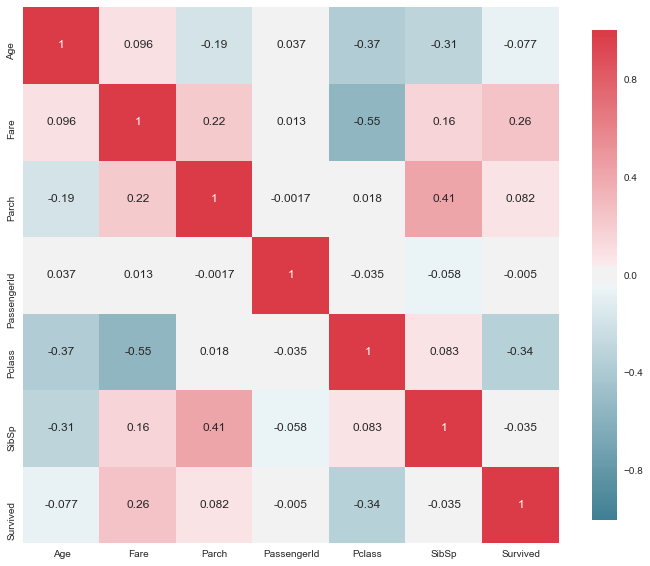

In [39]:
plot_correlation_map(titanic)

In [40]:
# further explore the relationship between the features and the survival of passengers

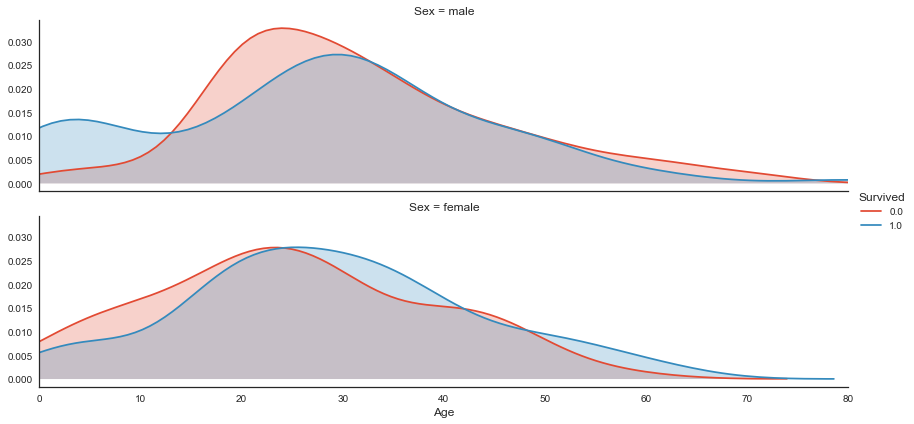

In [44]:
# Plot distributions of Age of passangers who survived or did not survive
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex' )

In [42]:
#Consider the graphs above. 
#Differences between survival for different values is 
#what will be used to separate the target variable (survival in this case) in the model. 
#If the two lines had been about the same, 
#then it would not have been a good variable for our predictive model.

In [ ]:
# Plot distributions of Fare of passangers who survived or did not survive
plot_distribution( titanic , var = 'Fare' , target = 'Survived'  )

# Embarked
We can also look at categorical variables like Embarked and their relationship with survival.

C = Cherbourg

Q = Queenstown

S = Southampton

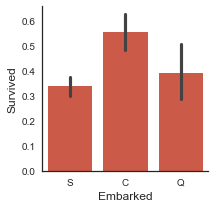

In [116]:
# Plot survival rate by Embarked
plot_categories( titanic , cat = 'Embarked' , target = 'Survived' )

# Investigating categorical variables
plot the survival rate of Sex, Pclass, SibSp and Parch below.

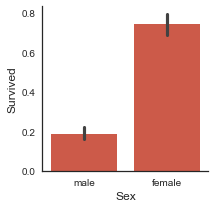

In [47]:
# Plot survival rate by Sex
plot_categories( titanic , cat = 'Sex' , target = 'Survived' )

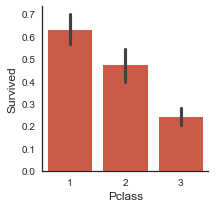

In [48]:
# Plot survival rate by Pclass
plot_categories( titanic , cat = 'Pclass' , target = 'Survived' )

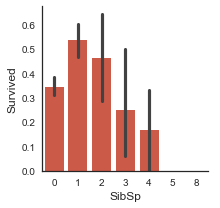

In [49]:
# Plot survival rate by SibSp
plot_categories( titanic , cat = 'SibSp' , target = 'Survived' )

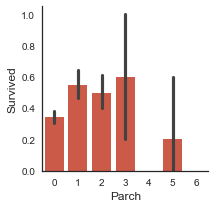

In [50]:
# Plot survival rate by Parch
plot_categories( titanic , cat = 'Parch' , target = 'Survived' )

# Data Preparation
The variables Embarked, Pclass and Sex are treated as categorical variables. 
Some of our model algorithms can only handle numeric values and so we need to create a new variable (dummy variable) for every unique value of the categorical variables.

In [56]:
# Transform Sex into binary values 0 and 1
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )

In [52]:
sex

0       1
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      1
24      0
25      0
26      1
27      1
28      0
29      1
       ..
1279    1
1280    1
1281    1
1282    0
1283    1
1284    1
1285    1
1286    0
1287    1
1288    0
1289    1
1290    1
1291    0
1292    1
1293    0
1294    1
1295    1
1296    1
1297    1
1298    1
1299    0
1300    0
1301    0
1302    0
1303    0
1304    1
1305    0
1306    1
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [54]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [57]:
# Create a new variable for every unique value of Embarked
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [58]:
# Create a new variable for every unique value of Embarked
pclass = pd.get_dummies( full.Pclass , prefix='Pclass' )
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


# Fill missing values in variables

Most machine learning alghorims require all variables to have values in order to use it for training the model. The simplest method is to fill missing values with the average of the variable across all observations in the training set.

In [59]:
# Create dataset
imputed = pd.DataFrame()


In [60]:
# Fill missing values of Age with the average of Age (mean)
imputed[ 'Age' ] = full.Age.fillna( full.Age.mean() )
# Fill missing values of Fare with the average of Fare (mean)
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )

imputed.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


# Feature Engineering--Creating New Variables

Extract titles from passenger names

In [61]:
title=pd.DataFrame()

In [62]:
title['Title']=full['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

In [63]:
title

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [64]:
# a map of more aggregated titles

In [65]:
Title_Dictionary={
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}

In [66]:
# we map each title
title['Title']=title.Title.map(Title_Dictionary)
title=pd.get_dummies(title.Title)
#title=pd.concat([title,titles_dummies],axis=1)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


extract cabin category information from the cabin number

In [72]:
cabin=pd.DataFrame()
#replacing missing cabins with U (for unknown)
cabin['Cabin']=full.Cabin.fillna('U')
cabin
#mapping each cabin value with the cabin letter
cabin['Cabin']=cabin['Cabin'].map(lambda c:c[0])
#dumming encoding....
cabin=pd.get_dummies(cabin['Cabin'], prefix='Cabin')
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [76]:
full

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


extract ticket class from ticket number,
a function that extracts each prefix of the ticket, return 'XXX' if no prefix 
(i.e. the ticket is a digit)

In [94]:
ticket=full['Ticket'][0]

In [95]:
ticket

'A/5 21171'

In [96]:
ticket=ticket.replace('.','')

In [97]:
ticket

'A/5 21171'

In [98]:
ticket=ticket.split()

In [99]:
ticket

['A/5', '21171']

In [100]:
ticket=map(lambda t: t.strip(), ticket)

In [101]:
ticket

['A/5', '21171']

In [102]:
ticket=list(filter(lambda t: not t.isdigit(), ticket))

In [103]:
ticket

['A/5']

In [104]:
len(ticket)

1

In [105]:
def cleanTicket(ticket):
    ticket=ticket.replace('.','')
    ticket=ticket.replace('/','')
    ticket=ticket.split()
    ticket=map(lambda t: t.strip(), ticket)
    ticket=list(filter(lambda t: not t.isdigit(), ticket))
    if len(ticket)>0:
        return ticket[0]
    else:
        return 'XXX'

In [106]:
ticket=pd.DataFrame()

# Extracting dummy variables from tickets:

In [107]:
ticket['Ticket']=full['Ticket'].map(cleanTicket)

In [108]:
ticket

,Ticket
0,A5
1,PC
2,STONO2
3,XXX
4,XXX
5,XXX
6,XXX
7,XXX
8,XXX
9,XXX


In [109]:
ticket=pd.get_dummies(ticket['Ticket'],prefix='Ticket')

In [110]:
ticket.shape

(1309, 37)

In [111]:
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


create family size and category for family size

The two variables Parch and SibSp are used to create the family size variable.

In [112]:
family=pd.DataFrame()
##introducing a new feature: the size of families(including the passenger)
family['FamilySize']=full['Parch']+full['SibSp']+1

##introducing other features based on the family size
family['Family_Single']=family['FamilySize'].map(lambda s: 1 if s==1 else 0)
family['Family_Small']=family['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
family['Family_Large']=family['FamilySize'].map(lambda s: 1 if 5<=s else 0)

In [113]:
family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


# Assemble final datasets for modeling

Split dataset by rows into test and train in order to have a holdout set to do model evaluation on.

The dataset is also split by columns in a matrix (X) containing the input data and a vector (y) containing the target (or labels).

Variable Selection

Select which features/variables to inculde in the dataset from the list below:

imputed

embarked

pclass

sex

family

cabin

ticket

In [149]:
# Select which features/variables to include in the dataset from the list below:
# imputed , embarked , pclass , sex , family , cabin , ticket

full_X = pd.concat( [ imputed , embarked , cabin , sex ] , axis=1 )
full_X.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex
0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1
1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1


In [150]:
full_X

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex
0,22.000000,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1
1,38.000000,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0
2,26.000000,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0
3,35.000000,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0
4,35.000000,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1
5,29.881138,8.4583,0,1,0,0,0,0,0,0,0,0,0,1,1
6,54.000000,51.8625,0,0,1,0,0,0,0,1,0,0,0,0,1
7,2.000000,21.0750,0,0,1,0,0,0,0,0,0,0,0,1,1
8,27.000000,11.1333,0,0,1,0,0,0,0,0,0,0,0,1,0
9,14.000000,30.0708,1,0,0,0,0,0,0,0,0,0,0,1,0


# Create datasets

In [115]:
titanic.Survived

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      0.0
6      0.0
7      0.0
8      1.0
9      1.0
10     1.0
11     1.0
12     0.0
13     0.0
14     0.0
15     1.0
16     0.0
17     1.0
18     0.0
19     1.0
20     0.0
21     1.0
22     1.0
23     1.0
24     0.0
25     1.0
26     0.0
27     0.0
28     1.0
29     0.0
      ... 
861    0.0
862    1.0
863    0.0
864    0.0
865    1.0
866    1.0
867    0.0
868    0.0
869    1.0
870    0.0
871    1.0
872    0.0
873    0.0
874    1.0
875    1.0
876    0.0
877    0.0
878    0.0
879    1.0
880    1.0
881    0.0
882    0.0
883    0.0
884    0.0
885    0.0
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [151]:
# create training and testing datasets.
train_X=full_X[:891]
train_y=titanic.Survived
test_X=full_X[891:]

In [152]:
X_train,X_valid,y_train,y_valid=train_test_split(train_X,train_y,train_size=0.7)

# Feature importance

Selecting the optimal features in the model is important. We will now try to evaluate what the most important variables are for the model to make the prediction.

0.987158908507


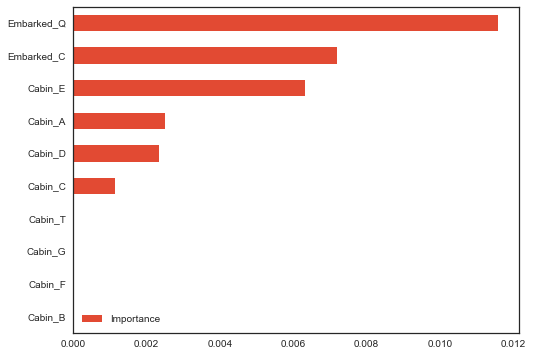

In [153]:
plot_variable_importance(X_train, y_train)

In [154]:
X_train.head()

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex
271,25.0,0.0000,0,0,1,0,0,0,0,0,0,0,0,1,1
754,48.0,65.0000,0,0,1,0,0,0,0,0,0,0,0,1,0
252,62.0,26.5500,0,0,1,0,0,1,0,0,0,0,0,0,1
155,51.0,61.3792,1,0,0,0,0,0,0,0,0,0,0,1,1
89,24.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1


In [156]:
X_train=X_train[['Cabin_A','Cabin_E','Embarked_S','Embarked_C','Cabin_F','Cabin_G']]

In [157]:
X_train

,Cabin_A,Cabin_E,Embarked_S,Embarked_C,Cabin_F,Cabin_G
271,0,0,1,0,0,0
754,0,0,1,0,0,0
252,0,0,1,0,0,0
155,0,0,0,1,0,0
89,0,0,1,0,0,0
514,0,0,1,0,0,0
812,0,0,1,0,0,0
492,0,0,1,0,0,0
451,0,0,1,0,0,0
688,0,0,1,0,0,0


# Modeling

We will now select a model we would like to try then use the training dataset to train this model and thereby check the performance of the model using the test set.

In [158]:
model_1=RandomForestClassifier(n_estimators=100)

In [159]:
model_2=SVC()

In [160]:
model_3=GradientBoostingClassifier()

In [161]:
model_4=KNeighborsClassifier(n_neighbors=3)

In [162]:
model_5=GaussianNB()

In [163]:
model_6=LogisticRegression()

# Train the selected model

In [164]:
model_1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [165]:
model_2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [166]:
model_3.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [167]:
model_4.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [168]:
model_5.fit(X_train,y_train)

GaussianNB(priors=None)

In [169]:
model_6.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluation--Model Performance

We can evaluate the accuracy of the model by using the validation set where we know the actual outcome.

We then compare this accuracy score with the accuracy when using the model on the training data. If the difference between these are significant this is an indication of overfitting. We try to avoid this because it means the model will not generalize well to new data and is expected to perform poorly.

In [170]:
X_valid=X_valid[['Cabin_A','Cabin_E','Embarked_S','Embarked_C','Cabin_F','Cabin_G']]

In [171]:
# Score the model
print (model_1.score( X_train , y_train ) , model_1.score( X_valid , y_valid ))

print (model_2.score( X_train , y_train ) , model_2.score( X_valid , y_valid ))

print (model_3.score( X_train , y_train ) , model_3.score( X_valid , y_valid ))

print (model_4.score( X_train , y_train ) , model_4.score( X_valid , y_valid ))

print (model_5.score( X_train , y_train ) , model_5.score( X_valid , y_valid ))

print (model_6.score( X_train , y_train ) , model_6.score( X_valid , y_valid ))



(0.651685393258427, 0.65298507462686572)
(0.6468699839486356, 0.65298507462686572)
(0.651685393258427, 0.65298507462686572)
(0.63402889245585869, 0.61940298507462688)
(0.6420545746388443, 0.62313432835820892)
(0.6484751203852327, 0.64552238805970152)


# Automagic

(0.651685393258427, 0.65298507462686572)
Optimal number of features : 6


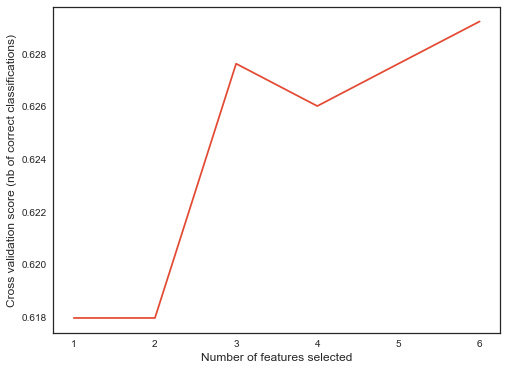

In [172]:
rfecv = RFECV( estimator = model_1 , step = 1 , cv = StratifiedKFold( y_train , 2 ) , scoring = 'accuracy' )
rfecv.fit( X_train , y_train )

print (rfecv.score( X_train , y_train ) , rfecv.score( X_valid , y_valid ))
print( "Optimal number of features : %d" % rfecv.n_features_ )

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel( "Number of features selected" )
plt.ylabel( "Cross validation score (nb of correct classifications)" )
plt.plot( range( 1 , len( rfecv.grid_scores_ ) + 1 ) , rfecv.grid_scores_ )
plt.show()

In [175]:
test_X=test_X[['Cabin_A','Cabin_E','Embarked_S','Embarked_C','Cabin_F','Cabin_G']]

In [177]:
test_Y=model_1.predict(test_X)
Passenger_id=full[891:].PassengerId
test=pd.DataFrame({'PassengerId': Passenger_id, 'Survived': test_Y})

In [179]:
test.shape
test.head()
test.to_csv('Desktop/titanic_pred.csv',index=False)